<a href="https://colab.research.google.com/github/raminass/Software-Project/blob/main/large_scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Large Scale + C Example Test

# Example of Large scale project

[Linux Source Code](https://github.com/torvalds/linux)

# C modules

Modules in C are just source files that contain functions, variables, and other definitions. A header file is a file that contains declarations of functions, variables, and other constructs that are shared between multiple source files. Header files allow you to use the declarations in multiple source files without having to copy and paste the declarations into each source file.

Here's an example of how you might use multiple modules and a header file in C:



```c
// foo.c
#include "foo_bar.h"

int x = 1;

int foo(int d) {
    return d + x;
}

// bar.c
#include "foo_bar.h"

int y = 2;

int bar(int d) {
    return d + y;
}

// foo_bar.h
#ifndef FOOBAR_H_
#define FOOBAR_H_

int foo(int d);  /* An example function declaration */
int bar(int d);
#endif // FOOBAR_H_

```



In this example, foo.c and bar.c are source files that contain definitions for the functions foo and bar, respectively. foo_bar.h is a header file that declares foo and bar as functions.

To use the definitions from foo.c and bar.c in another source file, you would include foo_bar.h at the top of the file like this:



```c
//main.c
#include <stdio.h>
#include "foo_bar.h" /* Include the header here, to obtain the function declaration */

int main(void)
{
    int a = foo(3); /* Use the function here */
    int b = bar(3);
    printf("%d\n", a);
    printf("%d\n", b);
    return 0;
}
```


```shell
$ gcc -o my_app main.c foo.c bar.c
$ ./my_app
4
5
```




You can also compile the individual .c files as shown below and finally create the *greetings executable as shown below.



```shell
% gcc -c foo.c
% gcc -c bar.c
% gcc -c main.c
% gcc -o my_app main.o foo.o bar.o
```



# Dependency Management
In C (and other programming languages), dependency management refers to the process of handling the dependencies between different parts of a project. In a C project, dependencies can occur between source files, header files, and libraries.

For example, consider a project from previous section:



```shell
main.c
foo.c
bar.c
foo_bar.h
```

In this case, main.c depends on foo.c and barr.c, since it includes the header file and calls functions defined in the source file.



## How is the dependency manged ?

To manage these dependencies, you can use a tool like ***make*** to specify the rules for building the project. The makefile can specify the dependencies between the files and the commands needed to build them.

For example, the foobar project:

```shell
my_app: main.o foo.o bar.o foo_bar.h
	gcc -o my_app main.o foo.o bar.o

main.o: main.c
	gcc -c main.c

foo.o: foo.c
	gcc -c foo.c

bar.o: bar.c
	gcc -c bar.c

```

In this makefile, the object files *main.o*, `foo.o` and `bar.o` are specified as dependencies for the target `my_app`. This means that `main.o` `foo.o` and `bar.o` will be built before my_app is built.

Dependency management is an important aspect of building C projects, as it ensures that the necessary files are built and up-to-date before they are used to build the final executables.

## What alternatives are there to Make?

Popular C/C++ alternative build systems are `SCons`, `CMake`, `Bazel`, and `Ninja`. Some code editors like Microsoft Visual Studio have their own built in build tools. For Java, there's `Ant`, `Maven`, and `Gradle`. Other languages like Go and Rust have their own build tools.

Interpreted languages like Python, Ruby, and Javascript don't require an analogue to Makefiles. The goal of Makefiles is to compile whatever files need to be compiled, based on what files have changed. But when files in interpreted languages change, nothing needs to get recompiled. When the program runs, the most recent version of the file is used.

## Makefile

A makefile is a file that contains a set of rules for building executables from source files. Makefiles are often used in C/C++ projects to specify how the executables should be built from the source code.

Here is an example of a simple makefile for a C project:




```shell
# Specify the target executable and the source files needed to build it
my_app: main.o foo.o bar.o foo_bar.h
	gcc -o my_app main.o foo.o bar.o
# Specify the object files that are generated from the corresponding source files
main.o: main.c
	gcc -c main.c

foo.o: foo.c
	gcc -c foo.c

bar.o: bar.c
	gcc -c bar.c

```
To build the target executable, you would run the make command:



```shell
make
```

You can also specify a specific target to build by passing it as an argument to the make command:

```shell
make my_app
```


The following Makefile ultimately runs all three targets. When you run make in the terminal, it will build a program called *my_app* in a series of steps:



*   Make selects the target **my_app**, because the first target is the default target
*   **my_app** requires **main.o foo.o bar.o foo_bar.h**, so make searches for the **main.o foo.o bar.o foo_bar.h** targets
*   **main.o** requires **main.c**, so make searches for the **main.c** target, **main.c** has no dependencies
*   The gcc -c command is then run, because all of the **main.o** dependencies are finished
*   **foo.o** requires **foo.c**, so make searches for the **foo.c** target, **foo.c** has no dependencies
*   The gcc -c command is then run, because all of the **foo.o** dependencies are finished
*   **bar.o** requires **bar.c**, so make searches for the **bar.c** target, **bar.c** has no dependencies
*   The gcc -c command is then run, because all of the **bar.o** dependencies are finished
*   **foo_bar.h** has no dependency, and Make just checks if it exists.
*   The top gcc command is run, because all the **my_app** dependencies are finished
*   That's it: **my_app** is a compiled c program




When we run make again, the following set of steps happens:

The first target is selected, because the first target is the default target.
This has a prerequisite of **main.o foo.o bar.o and foo_bar.h**
Make decides if it should run the my_app target. It will only run if **my_app** doesn't exist, or one of the prerequisite changed.
This last step is critical, and is the essence of make. What it's attempting to do is decide if the prerequisites of **my_app** have changed since **my_app** was last compiled. That is, if: **main.c, foo.c, bar.c or foo_bar.h** is modified, running make should recompile the file.

To make this happen, it uses the filesystem timestamps as a proxy to determine if something has changed.

## Syntax and structure

A Makefile consists of a set of rules. A rule generally looks like this:



```shell
target: prerequisites
	command
	command
	command
```


*   The target usually are file names.
*   The commands are a series of steps typically used to make the target. These need to start with a tab character, not spaces.
*   The prerequisites are also file names, separated by spaces. These files need to exist before the commands for the target are run. These are also called dependencies

## Variables

You can use variables in a makefile to make it more flexible and easier to maintain. For example:



```shell
CC = gcc
CFLAGS = -Wall -Wextra -Werror

hello: main.o greetings.o
    $(CC) -o hello main.o greetings.o $(CFLAGS)

main.o: main.c
    $(CC) -c main.c $(CFLAGS)

greetings.o: greetings.c
    $(CC) -c greetings.c $(CFLAGS)

```



## Make clean

clean is often used as a target that removes the output of other targets, but it is not a special word in Make. You can run make and make clean on this to create and delete some_file (e.g binaries).



```shell
target: prerequisites
    command

clean:
	rm -f some_file
```
Example, clean all intermediate binaries:



```shell
clean:
	rm -f *.o
```




# Version Control

The management of changes to documents, computer programs, web sites,
and other collections of information

Main goals
*   Track changes of different versions as they existed at different timestamps.
*   The ability to branch and merge to and from several code branches.

There are many vc tools, the most popular one is Git.


## Git

Started as an open source project to manage the source code of Linux.
GitHub is a company that provides Git publicly and storage of the code in their cloud, it's free (up to some size)


## Working with Git

We will demonstrate key steps when working with Git over Github.
There are plenty of commands that are rarely used, always you can refer tot the documentation if advanced things needed.

###1.Install
Install Git on your computer by downloading it from the official website (https://git-scm.com/) or using a package manager (e.g., apt-get install git on Ubuntu).



###2.Create a local git repository



```shell
git init
```
This will create a new .git directory in your project folder, which will be used to store the repository information.


###3.Make some changes

Make some code changes or addition.


###4.Stage your changes

Adding the files you want to track to the repository by running the following command:


```shell
git add <filename>
```

You can also add all the files in the current directory by using the . wildcard:



```shell
git add .
```

Why do we need staging ?


###5.Commit changes

```shell
git commit -m "Initial commit"
```



These steps are when we make one change, what if we have many changes, let's say a feature that has many milestones. Well for that purpose branching is used.


### Create a new repository on GitHub

![](https://product.hubspot.com/hs-fs/hubfs/Git_1.png?width=600&name=Git_1.png)

![](https://product.hubspot.com/hs-fs/hubfs/Git_2.png?width=512&name=Git_2.png)



```shell
git remote add origin <https://>
git push -u origin main
```



###Push your code

When you are ready to share your changes with other developers, you can push the changes to a remote repository (e.g., on GitHub) by running the following command:


```shell
git push <remote> <branch-name>
```
This will push the changes in the specified branch to the specified remote repository.


###Branch

Create a new branch for your project by running the following command:

```shell
git branch <branch-name>
```



### Switch branch
You can switch to the new branch by running the following command:


```shell
git checkout <branch-name>
```





### Merging

If you want to merge the changes from another branch into your current branch, you can use the git merge command. For example:

```shell
git merge <other-branch>
```

This will merge the changes from other-branch into the current branch.



###Push a branch to GitHub



```shell
git push origin my-new-branch
```

![](https://product.hubspot.com/hs-fs/hubfs/Git_3.png?width=869&name=Git_3.png)

###Create a pull request (PR)

Merging your code to master and eventually to producton environment.

![](https://product.hubspot.com/hs-fs/hubfs/Git_4.png?width=600&name=Git_4.png)

### Other usefull commands


View commit history tree
```shell
git log --all --graph --decorate
```

Check the diff of a file
```shell
git diff <filename>
```




#Product lifecycle



## Project Management

Kanban Board
![](https://luna1.co/f9f450.png)

## CI/CD

![](https://www.testingdocs.com/wp-content/uploads/CiCD-pipeline.png)

![](https://miro.medium.com/max/1400/1*XljFv5ON0CU97NPJVCdaog.png)

## Testing

#### Unit testing



*   Unit testing involves testing individual units or components of the software in isolation
*   It is typically focused on testing the smallest unit of code, such as a function or method, to ensure that it behaves as expected.
*   Directories of tests are associated with directories of source code.

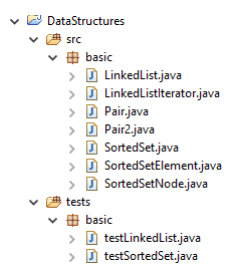



#### Regression testing

Test that the output of the software has not been defected
*   ‘Golden’ sets which are proven to be correct are maintained
*   The test
 *   Run the application to create output
 *   Use difference tools to compare the output with the ‘gold

#### Integration testing

*   Integration testing involves testing the integration between different units or components of the software.
*   It is typically focused on testing how the different components of the software work together, rather than testing each component in isolation.

#### Performance testing
Performance testing involves testing the performance of the software, such as its speed, scalability, and resource usage.

#### Security testing
Security testing involves testing the security of the software, such as its ability to protect against unauthorized access or attacks

And more ...

### Example 1 Automation

There many testing frameworks, we will demonstrate a basic one called **pytest**


test_example.py
```python
import pytest

def test_factorial():
    # Test that the factorial function returns the correct result
    from math import factorial
    assert factorial(5) == 120
    assert factorial(10) == 3628800

def test_factorial_negative_input():
    # Test that the factorial function raises a ValueError for negative input
    from math import factorial
    with pytest.raises(ValueError):
        factorial(-1)

def test_example():
    # Test that 1 + 1 equals 2
    assert 1 + 1 == 2

def test_another_example():
    # Test that the sum of a list is correct
    assert sum([1, 2, 3]) == 6

@pytest.mark.xfail
def test_expected_failure():
    # Test that will fail, but is expected to
    assert 1 + 1 == 3

@pytest.mark.skip
def test_skipped():
    # Test that will be skipped
    assert 1 + 1 == 4
```




To run the test above, run the below command:
```shell
pytest
```



### Example 2 BDD

BDD Behavior-driven development tests, the idea is to describe how the application should behave in a very simple user/business-focused language (gherkin).

This example defines a Feature called "Online Reservations" and has three Scenarios, each of them describes a user goal, the actions the user takes, and the expected outcome using the Given-When-Then structure.

```
Feature: Online Reservations
  As a customer, I want to be able to make online reservations for a restaurant, so that I can easily plan my dining experience.

  Scenario: Make a reservation
    Given I am on the restaurant's website
    When I click on the "Reservations" button and enter my reservation details including the date, time, and number of guests
    And I click "Submit"
    Then my reservation should be confirmed and added to the restaurant's reservation schedule

  Scenario: Cancel a reservation
    Given I have a confirmed reservation for the restaurant
    When I navigate to the "My Reservations" page and click the "Cancel" button for my reservation
    Then my reservation should be cancelled and removed from the restaurant's reservation schedule

  Scenario: View availability
    Given I am on the restaurant's website
    When I click on the "Reservations" button and select a date
    Then I should be able to view the availability for that date including the times that are fully booked and the times that have open tables

```



Popular tools: [Cucumber](https://cucumber.io/docs/gherkin/reference/), [Behave](https://behave.readthedocs.io/en/stable/) and others ...

### Example 3 Web Testing



```python
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
driver.get("http://www.python.org")
assert "Python" in driver.title
elem = driver.find_element(By.NAME, "q")
elem.clear()
elem.send_keys("pycon")
elem.send_keys(Keys.RETURN)
assert "No results found." not in driver.page_source
driver.close()
```



## Logging

Recording as much as we can events from our, it can be good events or errors/exception ...

The purpose is to help us investigate bugs in production by reading the logs.

```python
import logging
import sys

class CustomFormatter(logging.Formatter):
    """Logging Formatter to add colors and count warning / errors"""

    grey = "\x1b[38;21m"
    yellow = "\x1b[33;21m"
    red = "\x1b[31;21m"
    bold_red = "\x1b[31;1m"
    reset = "\x1b[0m"
    format = "%(asctime)s - %(name)s - %(levelname)s - %(message)s (%(filename)s:%(lineno)d)"

    FORMATS = {
        logging.DEBUG: grey + format + reset,
        logging.INFO: grey + format + reset,
        logging.WARNING: yellow + format + reset,
        logging.ERROR: red + format + reset,
        logging.CRITICAL: bold_red + format + reset
    }

    def format(self, record):
        log_fmt = self.FORMATS.get(record.levelno)
        formatter = logging.Formatter(log_fmt)
        return formatter.format(record)

# create logger with 'spam_application'
logger = logging.getLogger("Sample")

# create console handler with a higher log level
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

if len(sys.argv)> 1:
    if sys.argv[1] == 'log':
        ch.setFormatter(logging.Formatter('%(asctime)s : %(levelname)s : %(name)s : %(message)s'))
    elif sys.argv[1] == 'color':
        ch.setFormatter(CustomFormatter())

if len(sys.argv) > 2:
    logger.setLevel(logging.__getattribute__(sys.argv[2]))
else:
    logger.setLevel(logging.DEBUG)

logger.addHandler(ch)

# logger.debug("debug message")
# logger.info("info message")
# logger.warning("warning message")
# logger.error("error message")
# logger.critical("critical message")

import random
import time
for _ in range(100):
    i = random.randint(0, 10)
    if i <= 4:
        logger.info("Value is {} - Everything is fine".format(i))
    elif i <= 6:
        logger.warning("Value is {} - System is getting hot".format(i))
    elif i <= 8:
        logger.error("Value is {} - Dangerous region".format(i))
    else:
        logger.critical("Maximum value reached")
    time.sleep(0.3)


```





```shell
$ python logger.py
# Raw output as with just prints
$ python logger.py log
# Log formatted output
$ python logger.py log ERROR
# Print only ERROR levels and above
$ python logger.py color
# Color formatted output
```



# C Exam Questions

## 2021 AA
1.a(15)
Write a program that gets a number of command line's arguments from the user, the program has to print the number of arguments (excluding the name of the program) that as a string they are 1 char long.

2.b(15)

Given the below linked list:


```c
typedef struct list_t {
      int val;
      struct list_t* next;
} LIST;
```
Write a function concat the receives 2 pointers to non empty linked lists, and concatenates the second LL to the end of the first one, no need to return anything.

3.c(15)

Write a function called create, that gets a natural number n and returns a pointer called a, the pointer should point to a data structure that stores n*n integers, and it's elements are accecible using this syntaxt a[i][j] (i,j are between 1-n) and all values are initialized to 0.



Solution

```c
void main(int argc, char* argv[])
{
	int count = 0;
	for (int i = 1; i < argc; ++i)
	{
		char* arg = argv[i];
		if(arg[1] == '\0')
		{
			count++;
		}
	}

	printf("%d\n", cou);
}

```



```c
void concat(LIST* a, LIST* b)
{
	while (a->next != NULL)
	{
		a = a->next;
	}

	a->next = b;
}
```



```c
int** create(int n)
{
	int i, j;
	int **vals = (int**)malloc(n * sizeof(int*));
	assert(vals);
	for (i = 0; i < n; i++)
	{
		int* m = (int*)malloc(n * sizeof(int));
		assert(m);
		for (j = 0; j < n; j++)
		{
			m[j] = 0;
		}
		vals[i] = m-1 ;
	}


	return vals-1;
}

```

